In [1]:
!which python

/Users/sam/opt/anaconda3/envs/oy-env/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data import data_collection
import psycopg2

In [6]:
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)

In [64]:
!ls

01_erh_download_and_explore_data.ipynb ay_df_19_21.csv
02_samt_exploratory.ipynb              ay_df_22_24.csv
02_samt_v2_exploratory.ipynb           oy_df.csv
Kyle_Exploration.ipynb                 oy_df_16_18.csv
README.md                              oy_df_19_21.csv
age_data.csv                           oy_df_22_24.csv
ay_df.csv                              project_outcomes.ipynb
ay_df_16_18.csv                        racial_data.csv


In [7]:
import src.numeric_visualization as viz


In [8]:
viz.import_and_assign()

In [25]:
# assigning 'groomed' csv data to variables as dataframes
ay_df = pd.read_csv('ay_df.csv')
oy_df = pd.read_csv('oy_df.csv')

#racial df
racial_df = pd.read_csv('racial_data.csv')

# age dfs
ay_df_16_18 = pd.read_csv('ay_df_16_18.csv')
ay_df_19_21 = pd.read_csv('ay_df_19_21.csv')
ay_df_22_24 = pd.read_csv('ay_df_22_24.csv')
oy_df_16_18 = pd.read_csv('oy_df_16_18.csv')
oy_df_19_21 = pd.read_csv('oy_df_19_21.csv')
oy_df_22_24 = pd.read_csv('oy_df_22_24.csv')

## VIZ: 
#### OY in 2016 vs. 2020

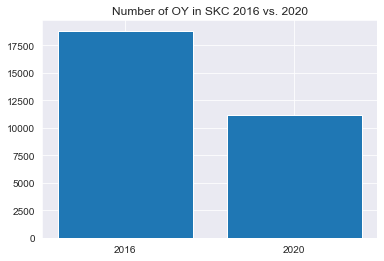

In [58]:
plt.bar(['2016', '2020'], [18817, 11115])
plt.title('Number of OY in SKC 2016 vs. 2020')
pass

## VIZ:
#### OY by Age

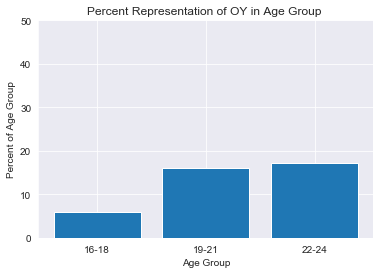

In [59]:
age_group_strings = ['16-18', '19-21', '22-24']
ay_age_group_val_list = [ay_df_16_18['pwgtp'].sum(),
                        ay_df_19_21['pwgtp'].sum(),
                        ay_df_22_24['pwgtp'].sum()]

oy_age_group_val_list = [oy_df_16_18['pwgtp'].sum(),
                        oy_df_19_21['pwgtp'].sum(),
                        oy_df_22_24['pwgtp'].sum()]
oy_percentage_of_age_pop = [int(o) / int(y) for o,y in zip(oy_age_group_val_list, ay_age_group_val_list)]
oy_percentage_of_age_pop = [x*100 for x in oy_percentage_of_age_pop]
plt.ylim(0,50)
plt.bar(age_group_strings, oy_percentage_of_age_pop)
plt.title('Percent Representation of OY in Age Group ')
plt.xlabel('Age Group')
plt.ylabel('Percent of Age Group')
pass

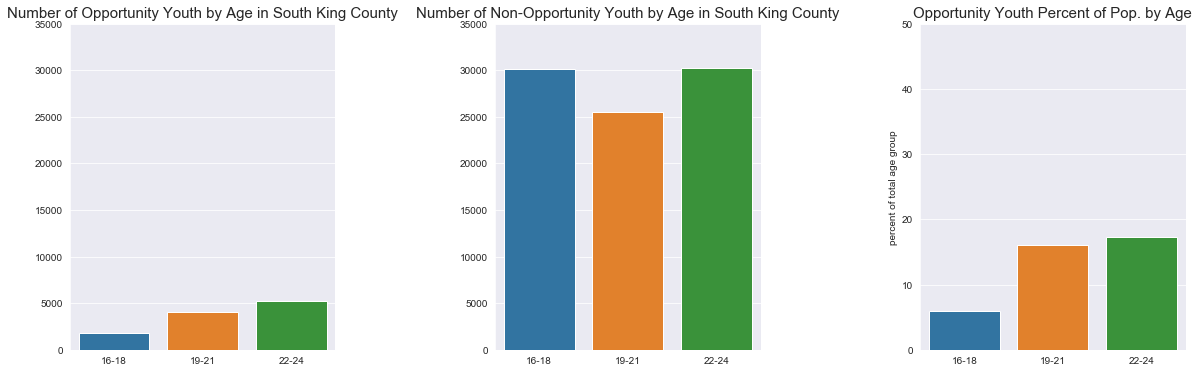

In [39]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20,6))
axes[0].set_ylim(0,35000)
axes[1].set_ylim(0,35000)
axes[2].set_ylim(0,50)
sns.barplot(y = oy_age_group_val_list, 
            x = age_group_strings, 
            ax = axes[0]).set_title('Number of Opportunity Youth by Age in South King County', fontsize=15)
sns.barplot(y = ay_age_group_val_list, 
            x = age_group_strings, 
            ax = axes[1]).set_title('Number of Non-Opportunity Youth by Age in South King County', fontsize=15)
sns.barplot(y = [x*100 for x in oy_percentage_of_age_pop], 
            x = age_group_strings,
            ax = axes[2]).set_title('Opportunity Youth Percent of Pop. by Age', fontsize=15)
axes[2].set_ylabel('percent of total age group')
plt.subplots_adjust(wspace = 0.6) 


## VIZ:
#### OY by Race

In [63]:
racial_df = pd.read_csv('racial_data.csv')
racial_df.columns = ['unnamed', 'race',  'rate_of_oy', 'total_youth_pop',  'proportion_of_oy', 'oy_total']

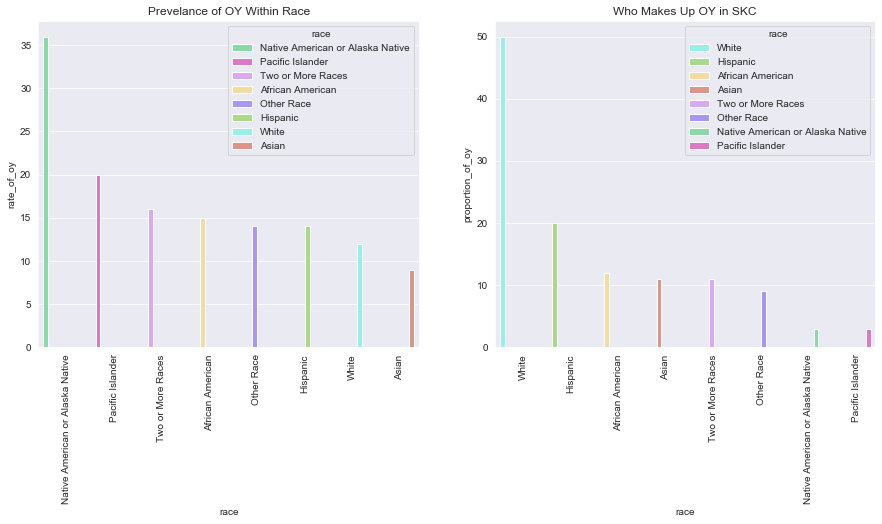

In [62]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
race_palette = {'White':'#87FFF6', 'Hispanic':'#A6E87B', 'African American':'#FFE294', 'Asian':'#E88D7B', 'Two or More Races':'#DD9EFF', 'Other Race':'#A187FF', 'Native American or Alaska Native':'#7BE8A3', 'Pacific Islander':'#EB6ACC'}

sns.barplot(data=racial_df.sort_values('rate_of_oy', ascending=False), x='race', y='rate_of_oy', hue='race', ax=ax[0], palette=race_palette)
ax[0].set_xticklabels(labels=racial_df.sort_values('rate_of_oy', ascending=False)['race'], rotation=90, ha='left')
ax[0].set_title('Prevelance of OY Within Race')
racial_df_sort_prop_oy = racial_df.sort_values('proportion_of_oy', ascending=False)
sns.barplot(data=racial_df_sort_prop_oy, x='race', y='proportion_of_oy', hue='race', ax=ax[1], palette=race_palette)
ax[1].set_xticklabels(labels=racial_df_sort_prop_oy['race'], rotation=90, ha='left')
ax[1].set_title('Who Makes Up OY in SKC')
pass